In [ ]:
# i took dataset of suicide rate overview from 1985 to 2016

In [3]:
import numpy as np 
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#reading the file
df = pd.read_csv (r'master.csv')

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
print(df)

          country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0                   6.71     Albania1987      

In [6]:
#Here RV function will be suicide_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
#DVS will be {country,year,sex ,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation}
#Iam taking Three numerical features: suicides_no,population,gdp_per_capita ($)
import matplotlib.pyplot as plt


In [7]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [9]:
df.shape

(27820, 12)

In [10]:
df.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [11]:
df.isnull().values.any()

True

In [12]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

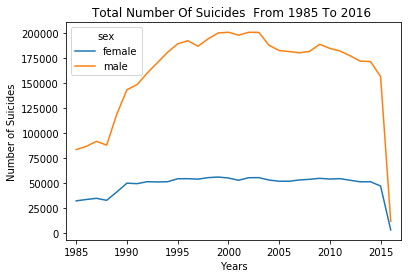

In [21]:
df.pivot_table('suicides_no', index='year', columns='sex', aggfunc='sum').plot()
plt.title('Total Number Of Suicides  From 1985 To 2016 ')
plt.ylabel('Number of Suicides')
plt.xlabel('Years')
plt.xlim((df.year.min() - 1), (df.year.max() + 1))
plt.show()

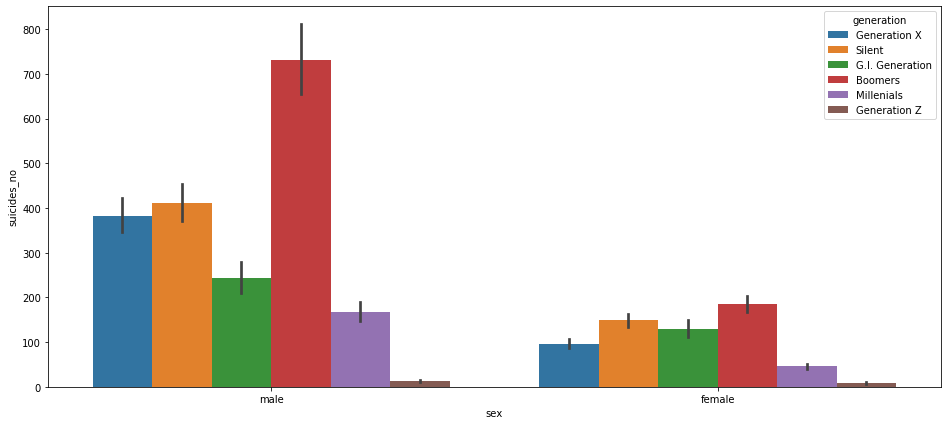

In [26]:
plt.figure(figsize=(16,7))
bar_gen = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation',data = df)

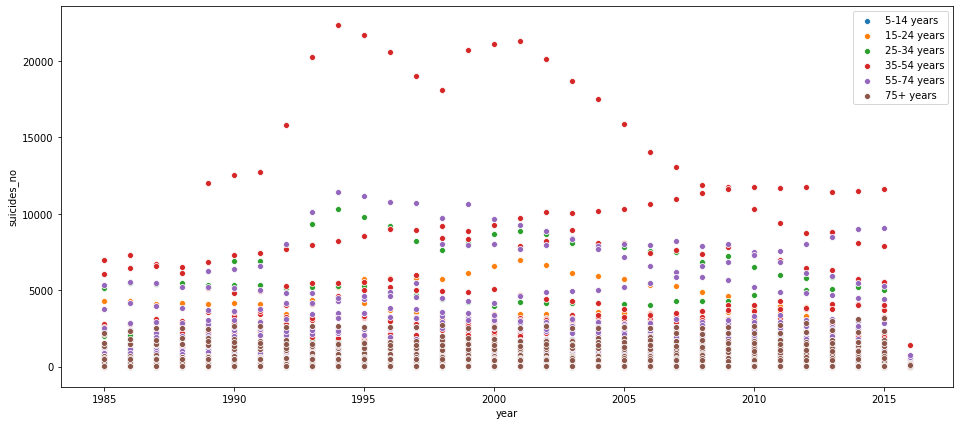

In [27]:
###we store a range of age group in variables so we can do easily lineplot
age_5 = df.loc[df.loc[:, 'age']=='5-14 years',:]
age_15 = df.loc[df.loc[:, 'age']=='15-24 years',:]
age_25 = df.loc[df.loc[:, 'age']=='25-34 years',:]
age_35 = df.loc[df.loc[:, 'age']=='35-54 years',:]
age_55 = df.loc[df.loc[:, 'age']=='55-74 years',:]
age_75 = df.loc[df.loc[:, 'age']=='75+ years',:]

### Set figure size
plt.figure(figsize=(16,7))
####Now lets plot a line plot
age_5_lp = sns.scatterplot(x='year', y='suicides_no', data=age_5)
age_15_lp = sns.scatterplot(x='year', y='suicides_no', data=age_15)
age_25_lp = sns.scatterplot(x='year', y='suicides_no', data=age_25)
age_35_lp = sns.scatterplot(x='year', y='suicides_no', data=age_35)
age_55_lp = sns.scatterplot(x='year', y='suicides_no', data=age_55)
age_75_lp = sns.scatterplot(x='year', y='suicides_no', data=age_75)

##Now make the legend
leg = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])

In [40]:
suicides_no=[]
for country in df.country.unique():
    suicides_no.append(sum(df[df['country']==country].suicides_no)) 
    

In [65]:
suicides_no=pd.DataFrame(suicidesNo,columns=['suicides_no'])
country=pd.DataFrame(df.country.unique(),columns=['country'])
data_suicide_countr=pd.concat([suicides_no,country],axis=1)

In [66]:
data_suicide_countr=data_suicide_countr.sort_values(by='suicides_no',ascending= False)

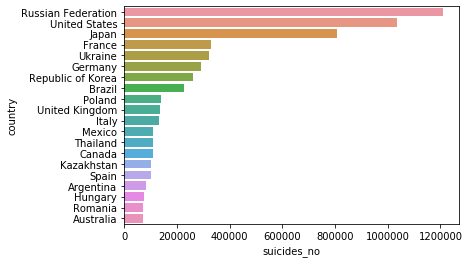

In [72]:
sns.barplot(y=data_suicide_countr.country[:20],x=data_suicide_countr.suicides_no[:20])
plt.show()

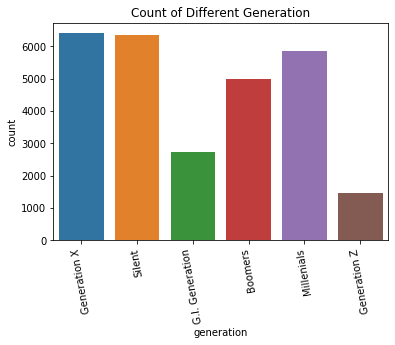

In [96]:
sns.countplot(df.generation)
plt.title('Count of Different Generation')
plt.xticks(rotation=100)
plt.show()

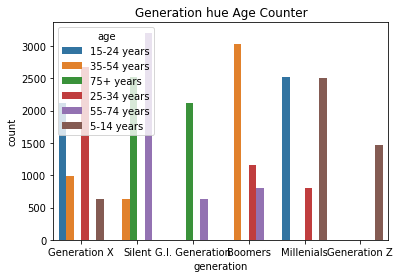

In [97]:
sns.countplot(df.generation,hue=df.age)
plt.title('Generation hue Age Counter')
plt.show()

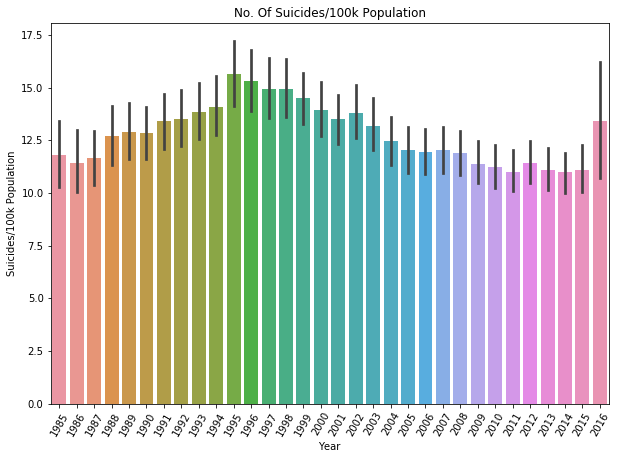

In [16]:
plt.figure(figsize=(10,7))
sns.barplot(x="year", y='suicides/100k pop', data=df)
plt.title('No. Of Suicides/100k Population')
plt.xlabel('Year')
plt.ylabel('Suicides/100k Population')
plt.xticks(rotation=60)
plt.show()


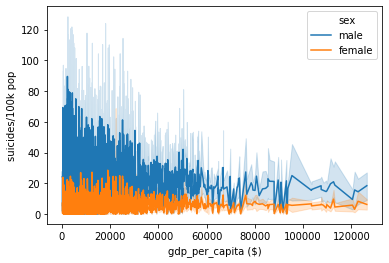

In [34]:
sns.lineplot(x="gdp_per_capita ($)", y="suicides/100k pop",
             hue="sex",data=df.sort_values(by='suicides/100k pop',ascending=False))
plt.show()


In [6]:
df.keys()

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [9]:
df.shape

(27820, 12)

In [10]:
from sklearn.preprocessing import StandardScaler

In [18]:
df.drop(['country', 'sex', 'country-year','generation','HDI for year','age','year'], axis=1)

,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,21,312900,6.71,"2,156,624,900",796
1,16,308000,5.19,"2,156,624,900",796
2,14,289700,4.83,"2,156,624,900",796
3,1,21800,4.59,"2,156,624,900",796
4,9,274300,3.28,"2,156,624,900",796
...,...,...,...,...,...
27815,107,3620833,2.96,"63,067,077,179",2309
27816,9,348465,2.58,"63,067,077,179",2309
27817,60,2762158,2.17,"63,067,077,179",2309
27818,44,2631600,1.67,"63,067,077,179",2309


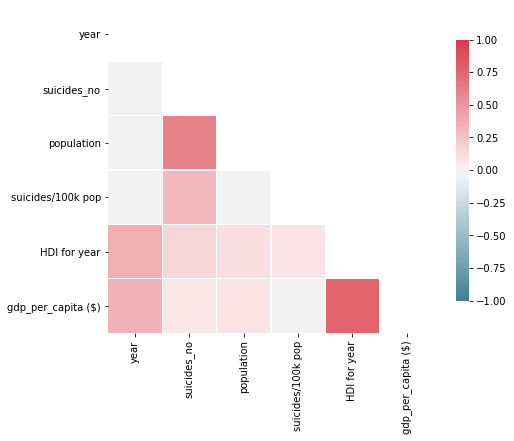

In [36]:
corr = df.corr()

# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8});

In [50]:
columns = ['country', 'year', 'sex', 'age','population',
       'suicides/100k pop', 'country-year', 'generation']
target = df['suicides_no']

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [52]:
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df['year'] = le.fit_transform(df['year'])
df['sex'] = le.fit_transform(df['sex'])
df['age'] = le.fit_transform(df['age'])
df['population'] = le.fit_transform(df['population'])
df['suicides/100k pop'] = le.fit_transform(df['suicides/100k pop'])
df['country-year'] = le.fit_transform(df['country-year'])
df['generation'] = le.fit_transform(df['generation'])

In [61]:
pca = PCA()
principalComponents_breast = pca.fit_transform(df[columns])
print(principalComponents_breast)

[[-2.31684505e+03 -4.53767702e+02  1.11999354e+03 ... -1.96117148e+00
  -1.07058042e+00 -4.63567807e-01]
 [-2.43358026e+03 -6.04235343e+02  1.11216061e+03 ... -2.28749710e+00
  -1.02630525e+00 -5.09103315e-01]
 [-2.91094103e+03 -6.34515173e+02  1.10626850e+03 ... -1.90114131e+00
  -1.04977949e+00  5.03890558e-01]
 ...
 [ 8.20582523e+03 -9.28808305e+02 -1.12575230e+03 ...  1.01996017e+00
  -2.58438260e-01 -7.18348912e-01]
 [ 8.08026418e+03 -9.77266079e+02 -1.12911135e+03 ...  1.06034728e+00
  -2.37513236e-01  2.72296037e-01]
 [ 6.25422584e+03 -9.76491580e+02 -1.14644126e+03 ...  3.69772770e+00
  -2.39223403e-01  2.02973656e-01]]


In [54]:
clf = DecisionTreeClassifier()
clf.fit(df[columns], target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
clf.feature_importances_

array([0.02654578, 0.08812791, 0.01008352, 0.02727822, 0.2886141 ,
       0.44604726, 0.08645713, 0.02684608])

In [58]:
target_pred = cross_val_predict(clf,df[columns],target,cv=6)
print('accuracy: ', accuracy_score(target, target_pred))
print('confusion matrix:')
print(confusion_matrix(target, target_pred))
print('classification report:')
print(classification_report(target, target_pred))

C:\Users\natha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)


accuracy:  0.45406182602444284
confusion matrix:
[[4281    0    0 ...    0    0    0]
 [   5 1518   16 ...    0    0    0]
 [   0   22 1046 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    1    0]]
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4281
           1       0.99      0.99      0.99      1539
           2       0.96      0.95      0.95      1102
           3       0.92      0.94      0.93       867
           4       0.86      0.91      0.89       696
           5       0.86      0.83      0.85       538
           6       0.79      0.76      0.78       467
           7       0.77      0.79      0.78       429
           8       0.75      0.77      0.76       365
           9       0.73      0.74      0.74       349
          10       0.66      0.64      0.65       290
          11       0.58      0.55      0.56       2

C:\Users\natha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#scatter plot for suicides_no  and population
y = df['population'];
x = df['suicides_no']


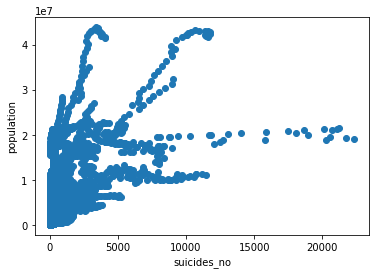

In [35]:
a =plt.xlabel('suicides_no');
b =plt.ylabel('population')
plt.scatter(x,y)

In [37]:
#scatter plot for suicides_no  and population
y = df['year'];
x = df['suicides_no']


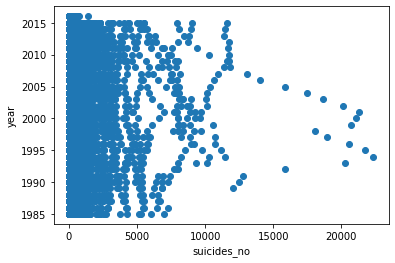

In [38]:
a =plt.xlabel('suicides_no');
b =plt.ylabel('year')
plt.scatter(x,y)

Text(0, 0.5, 'gdp_per_capita ($)')

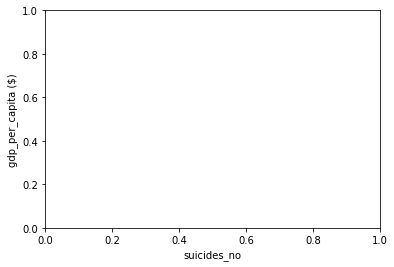

In [56]:
plt.xlabel('suicides_no');
plt.ylabel('gdp_per_capita ($)')

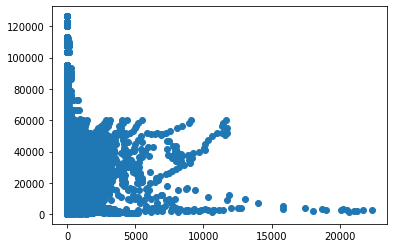

In [57]:
plt.scatter(x,y)

In [28]:
#finding pearson coefficient for each of the features
import scipy
from scipy.stats.stats import pearsonr

In [83]:
y = df['population'];
x = df['gdp_per_capita ($)']

In [84]:
pearson_correlation,p_value =pearsonr(x, y)

In [85]:
pearson_correlation 

0.08150985822280538

In [76]:
y = df['population'];
x = df['suicides_no']

In [77]:
pearson_correlation,p_value =pearsonr(x, y)

In [78]:
pearson_correlation

0.6161622675219284

In [79]:
x = df['gdp_per_capita ($)'];
y = df['suicides_no']

In [80]:
pearson_correlation,p_value =pearsonr(x, y)

In [81]:
pearson_correlation

0.06132974884024557

In [52]:
#finding scatter matrix for RV functions
df_features=df[['age','suicides_no','population','suicides/100k pop','HDI for year',' gdp_for_year ($) ','gdp_per_capita ($)']]

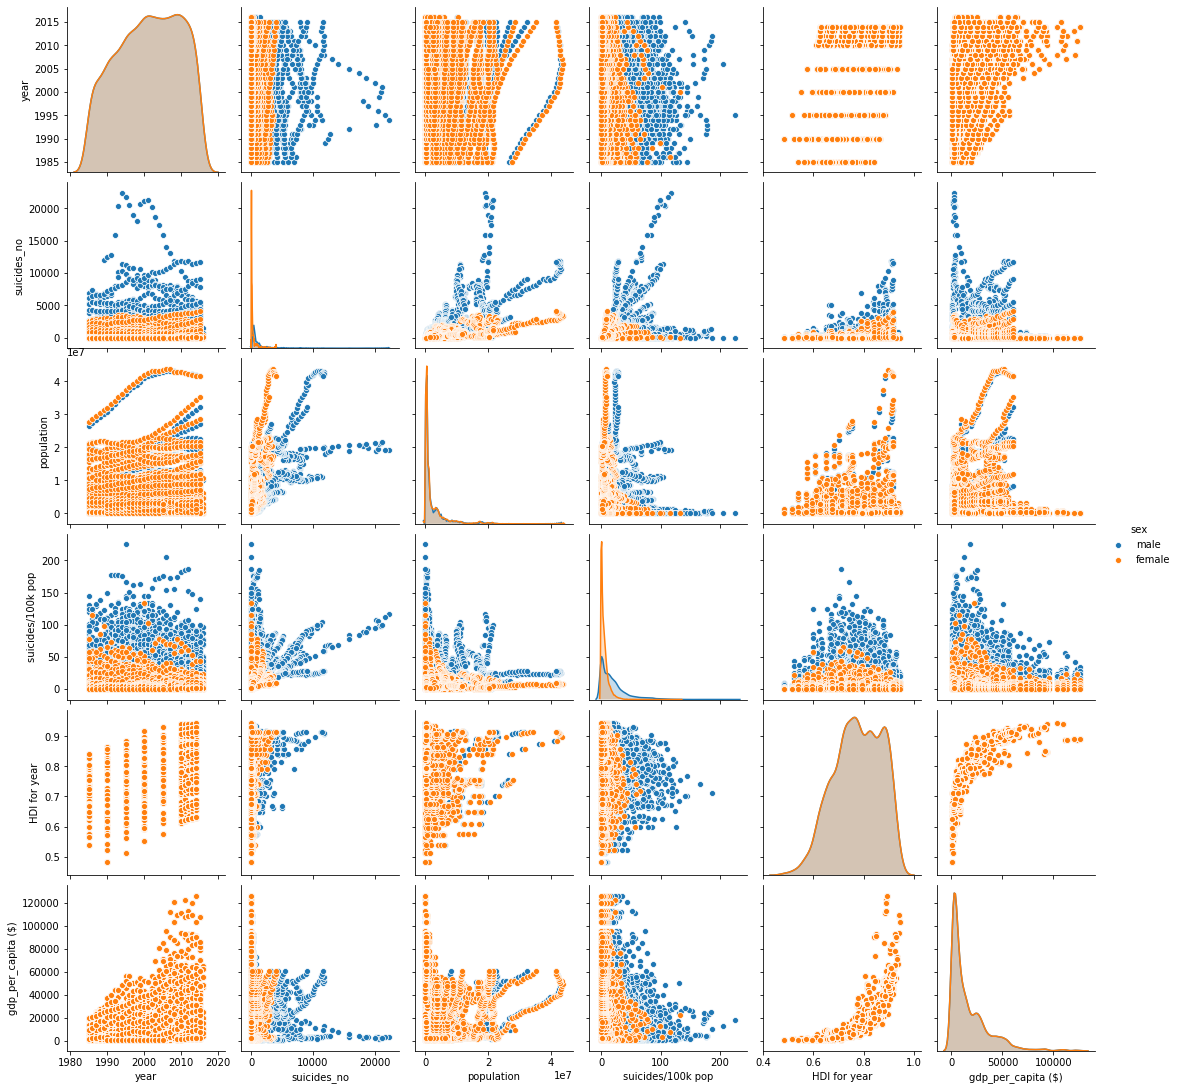

In [21]:
sns.pairplot(df, hue="sex")
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split


In [17]:
df.rename(columns={'HDI for year': 'HDI_for_year', 'country-year':'country_year', 'suicides/100k pop': 'suicides/100k_pop', ' gdp_for_year ($) ':'gdp_for_year', 'gdp_per_capita ($)':'gdp_per_capita'}, inplace=True);

In [18]:
data = df.copy()


In [19]:
data.generation.replace(['Boomers', 'Generation X', 'Generation Z', 'G.I. Generation', 'Millenials', 'Silent'], 
                        ['0', '1', '2', '3', '4', '5'], inplace=True)

data.sex.replace(['male', 'female'], ['0', '1'], inplace=True)

data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','')

def means(arr):
    return str(np.array(arr).mean())
data.age.replace(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years'], 
                 [means([15, 24]), means([25, 34]), means([35, 54]), 
                  means([5, 14]), means([55, 74]), means([75])], inplace=True)

In [20]:
data.drop(['country', 'year', 'country_year'], 1, inplace=True)

In [21]:
pd.to_numeric(data['generation']);
pd.to_numeric(data['sex']);
pd.to_numeric(data['gdp_for_year']);

In [22]:
data['fatality_rate'] = np.where(data['suicides/100k_pop']>data['suicides/100k_pop'].mean(), 
                                 1, 0)

In [23]:
data.head()

,sex,age,suicides_no,population,suicides/100k_pop,HDI_for_year,gdp_for_year,gdp_per_capita,generation,fatality_rate
0,0,19.5,21,312900,6.71,NaN,2156624900,796,1,0
1,0,44.5,16,308000,5.19,NaN,2156624900,796,5,0
2,1,19.5,14,289700,4.83,NaN,2156624900,796,1,0
3,0,75.0,1,21800,4.59,NaN,2156624900,796,3,0
4,0,29.5,9,274300,3.28,NaN,2156624900,796,0,0


In [28]:
X = np.array(data.drop(['fatality_rate','HDI_for_year', 'suicides/100k_pop'], 1))
y = np.array(data.fatality_rate)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
print("Model accuracy is: {0:.2f}".format(accuracy_score(y_test, y_pred) * 100))

Model accuracy is: 98.56


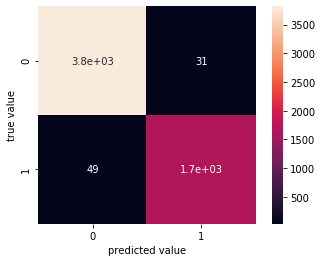

In [32]:
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat, square=True, annot=True, cbar=True)

plt.xlabel('predicted value')
plt.ylabel('true value');

In [33]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3865
           1       0.97      0.98      0.98      1699

    accuracy                           0.99      5564
   macro avg       0.98      0.98      0.98      5564
weighted avg       0.99      0.99      0.99      5564



In [7]:
df.corr()


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


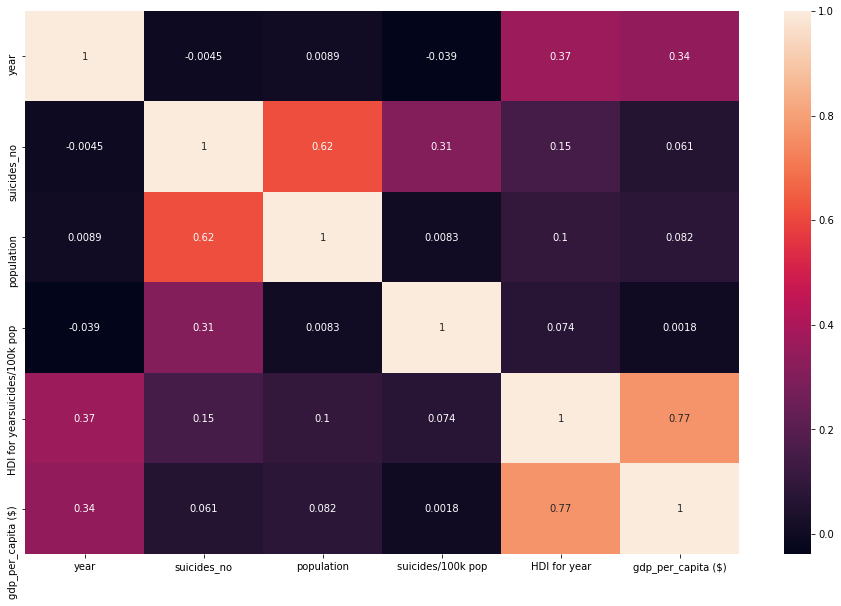

In [10]:
plt.figure(figsize=(16,10))
sb.heatmap(df.corr(),annot= True)
plt.show()